# MULTICLASS CLASSIFICATION 



In [57]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [58]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [59]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


In [60]:
#print the unique values in Y_train
np.unique(Y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

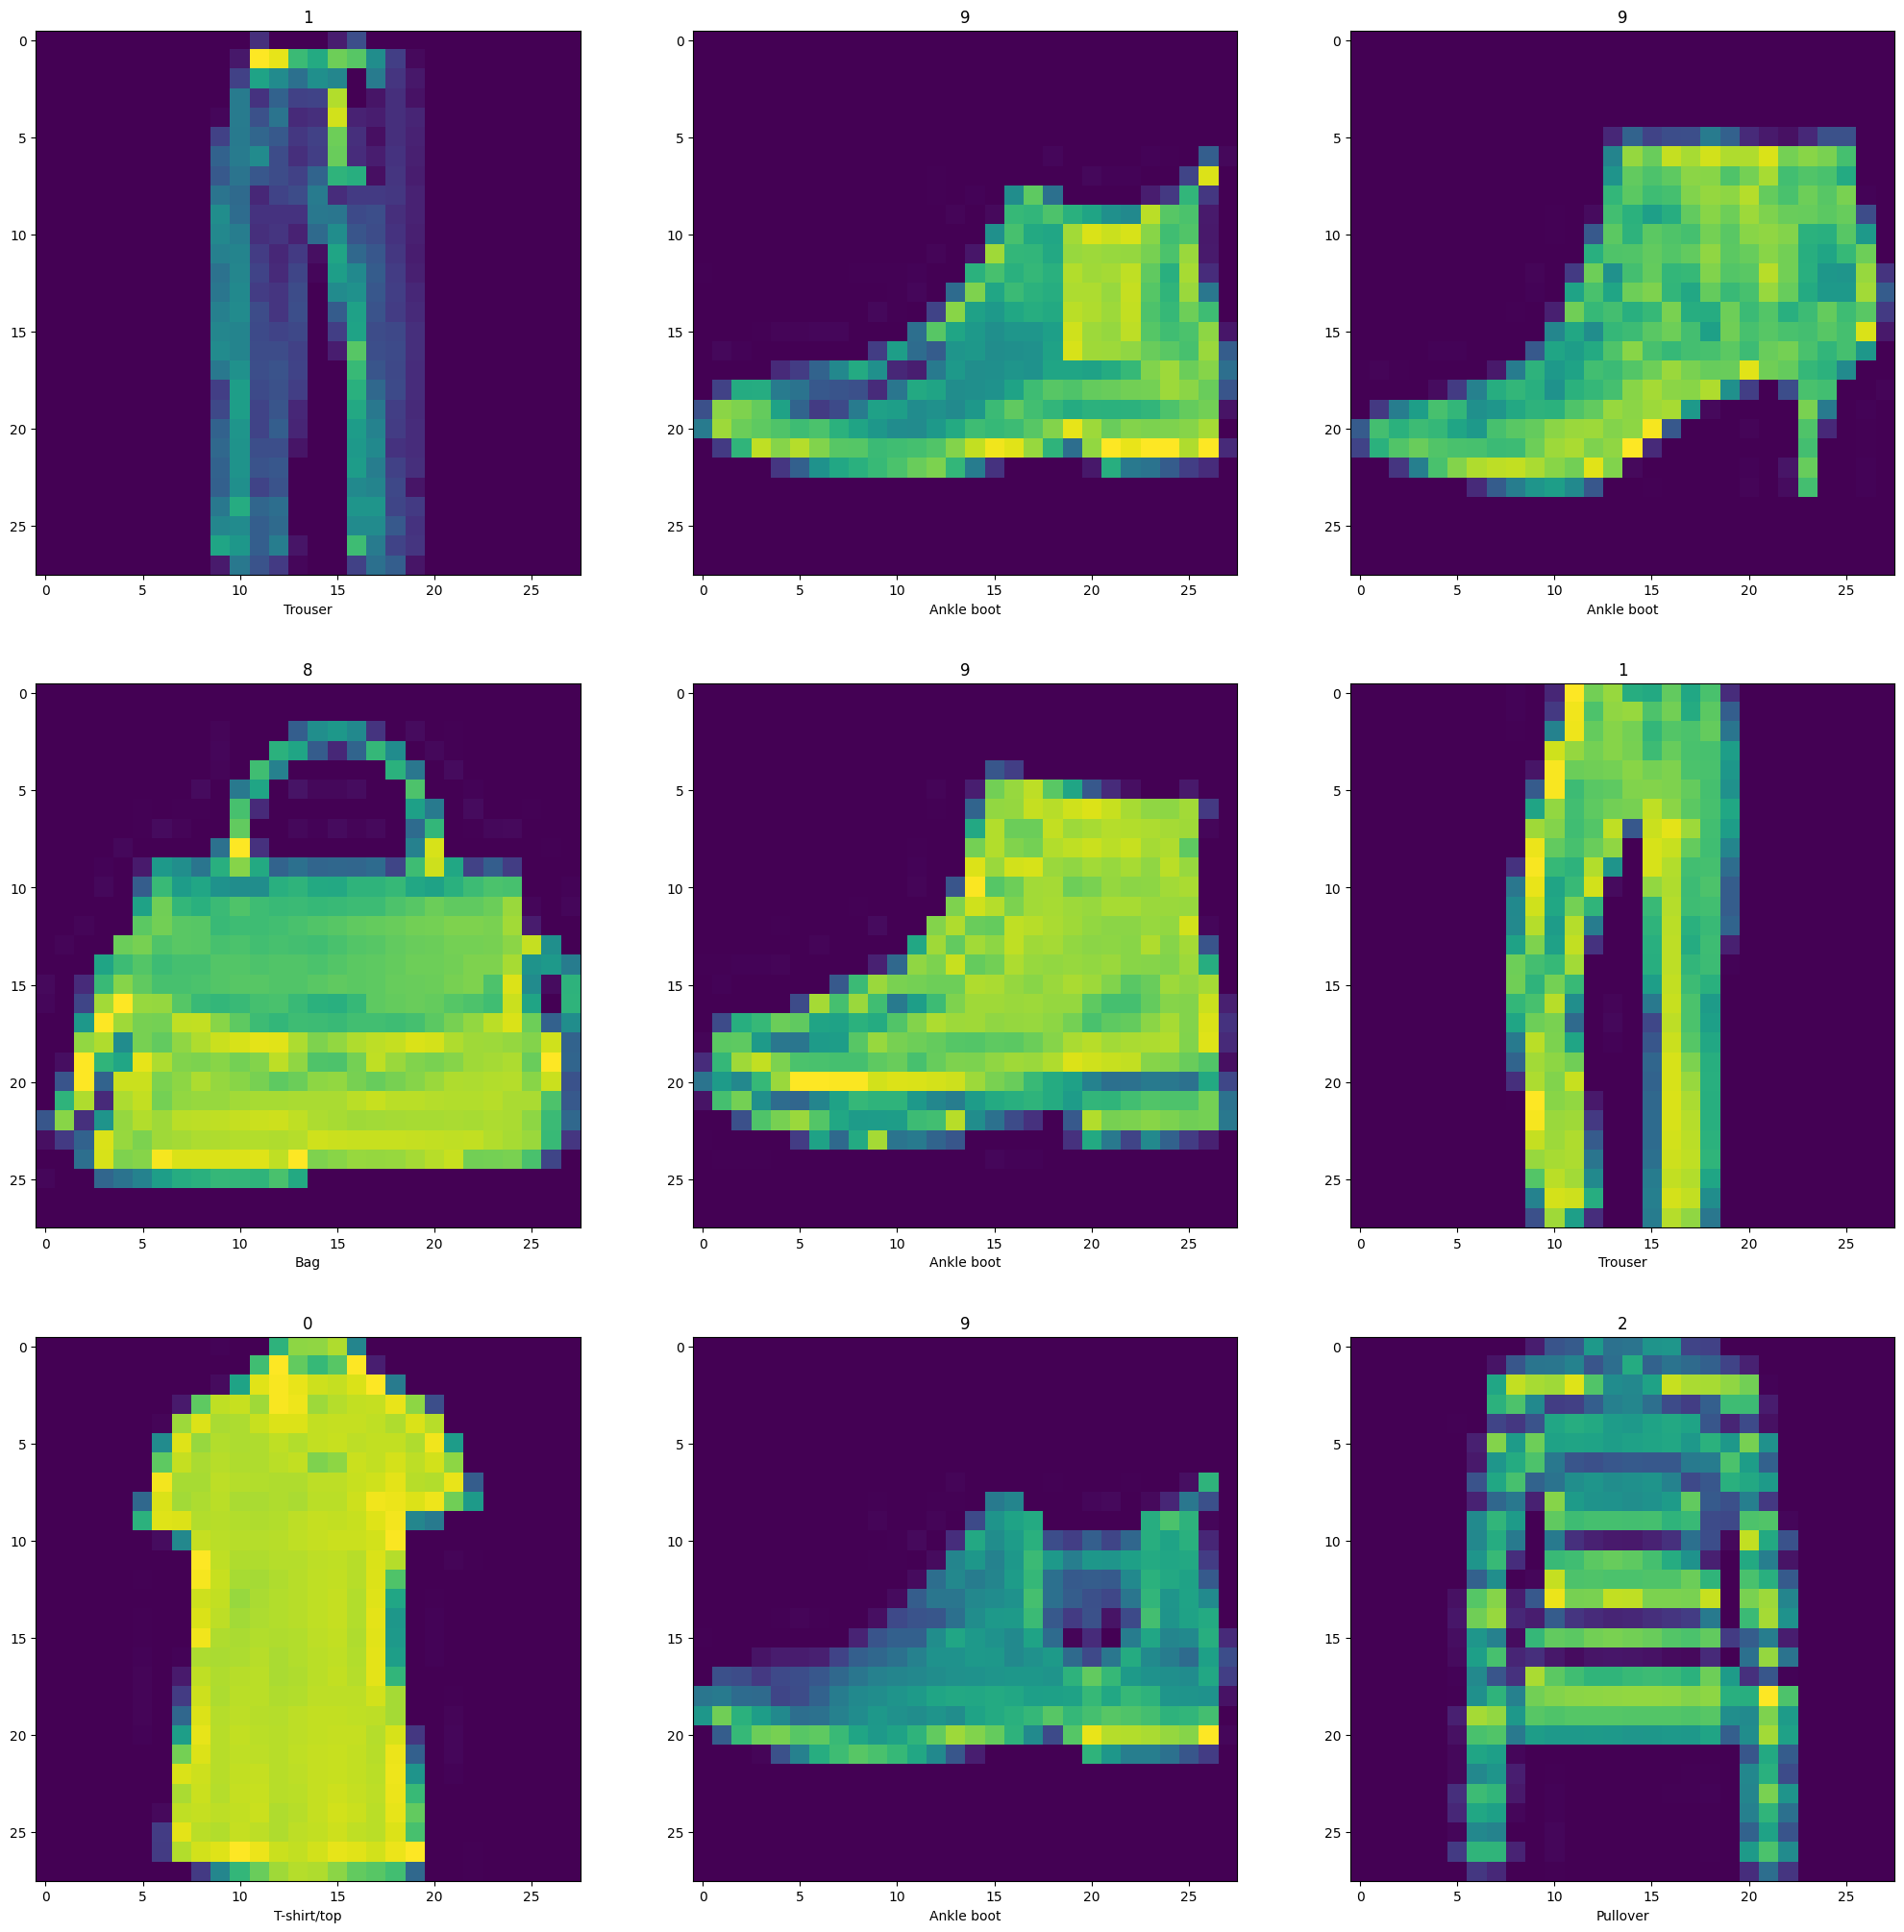

In [61]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','shirt','sneaker','Bag','Ankle boot']

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index]) # edit1: plot the image here
  plt.title(Y_train[index]) # edit2: add the label here
  plt.xlabel(class_names[Y_train[index]])
    
  
  


###These number denotes the respective object
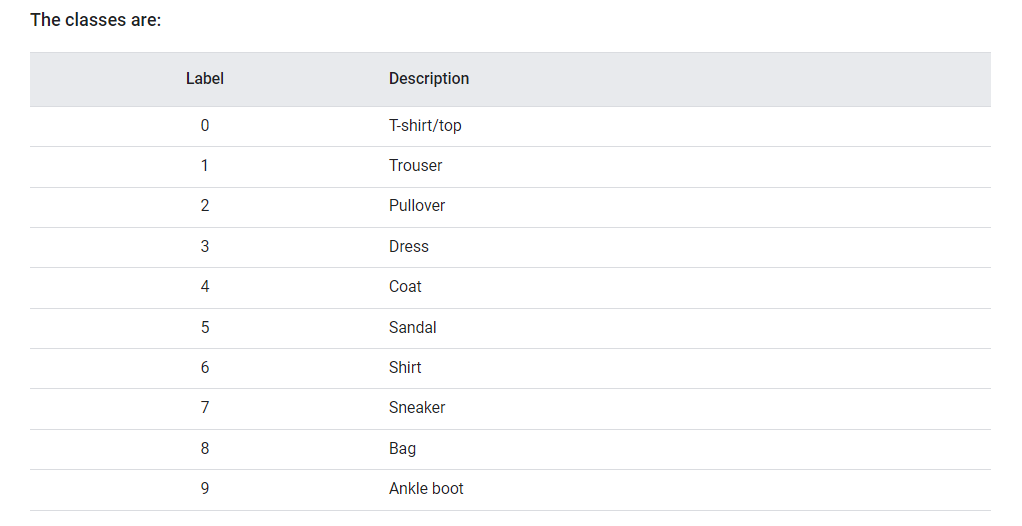

In [62]:
# Find the count of each type of class
unique,frequency = np.unique(Y_train, return_counts=True)

for i in range(len(frequency)):
    print(unique[i] ,":",frequency[i])


0 : 809
1 : 801
2 : 801
3 : 809
4 : 786
5 : 796
6 : 780
7 : 817
8 : 801
9 : 800


In [63]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output

model.add(tf.keras.layers.Dense(128,activation ='relu'))

#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10,activation ='softmax'))

In [64]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = tf.keras.losses.sparse_categorical_crossentropy ,metrics=['accuracy'])

In [65]:
#Lets analyse the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [66]:
""" 
[objective] Write the answer here: 118,282
"""

' \n[objective] Write the answer here: 118,282\n'

In [67]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(x=X_train,y=Y_train,validation_split=0.2,epochs=100,verbose = 0)

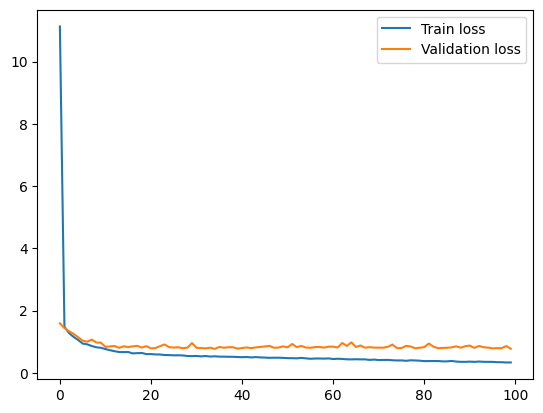

In [68]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [77]:
"""
[Under 100 words] Write your answer here: The validation loss is higher than the train loss which shows that the model is overfitted.
It perform good for training data but does not perform well for other data.The model does not have comparable performances on both the datasets.

"""

'\n[Under 100 words] Write your answer here: The validation loss is higher than the train loss which shows that the model is overfitted.\nIt perform good for training data but does not perform well for other data.The model does not have comparable performances on both the datasets.\n\n'

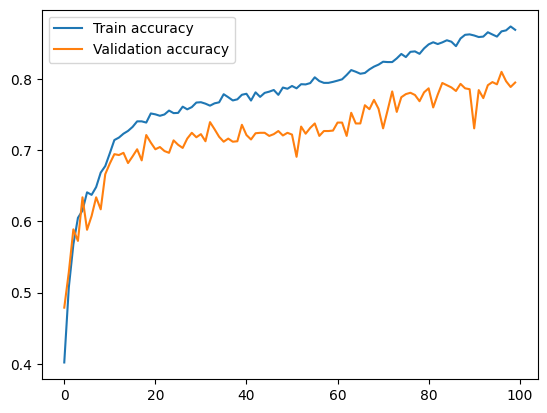

In [70]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [71]:
"""
[Under 100 words] Write your answer here:The model is overfitted.The train accuracy is higher than tha validation.The model cannot generalize and performs poorly
 on other set of data.The model has learned incorrectly which affect the performance in negative way.


"""

'\n[Under 100 words] Write your answer here:The model is overfitted.The train accuracy is higher than tha validation.The model cannot generalize and performs poorly\n on other set of data.The model has learned incorrectly which affect the performance in negative way.\n\n\n'

In [72]:
#Checking the prediction

Y_predicted = model.predict(X_test)
Y_predicted2 = np.argmax(Y_predicted,axis=1)

63/63 [==============================] - 0s 2ms/step


In [73]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score

r2_score(Y_test, Y_predicted2)


0.6474233106371216

In [74]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [75]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)

(128, 128)
(128, 10)


In [76]:
# Does that satisfied the matrix multiplication math discussed earlier

Yes it satisfies the matrix multiplication as the given input is flattened array of 1x784(28*28) which initially get dot with (784 x 128) weight matrix to give 1 x 128 matrix(1st hidden layer).then 1X128 matrix get multiplied with 128x128 to give 1x128 matrix(2nd hidden layer).Which again get multiplied with 128x10 to give 1x10(output layer).   